                                               Heart Diseases Analysis

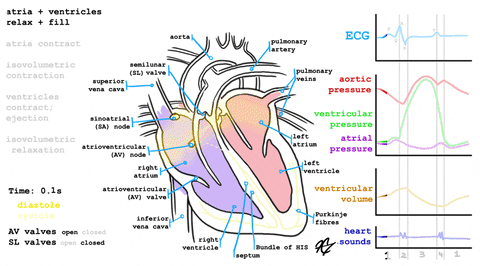

In [2]:
%autosave 0
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



Autosave disabled


ModuleNotFoundError: No module named 'pandas_profiling'

In [4]:
df= pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Attribute Description 

<ul>
<li><b>Age</b>: The person's age in years
<li><b>Sex</b>: The person's sex (1 = male, 0 = female)
<li><b>Chest_Pain_Type</b>: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
<li><b>Resting_Blood_Pressure</b>: The person's resting blood pressure (mm Hg on admission to the hospital)
<li><b>Cholesterol</b>: The person's cholesterol measurement in mg/dl
<li><b>Fasting_Blood_Sugar</b>: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
<li><b>Rest_Ecg</b>: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
<li><b>Max_Heart_Rate_Achieved</b>: The person's maximum heart rate achieved
<li><b>Exercise_Induced_Angina</b>: Exercise induced angina (1 = yes; 0 = no)
<li><b>St_Depression</b>: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
<li><b>St_Slope</b>: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
<li><b>Num_major_vessels</b>: The number of major vessels (0-3)
<li><b>Thalassemia</b>: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
<li><b>Heart_Disease</b>: Heart disease (0 = no, 1 = yes)
</ul>

In [5]:
df.columns = ['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Cholesterol', 'Fasting_Blood_Sugar', 'Rest_Ecg', 'Max_Heart_Rate_Achieved',
             'Exercise_Induced_Angina', 'St_Depression', 'St_Slope', 'Num_major_vessels', 'Thalassemia', 'Heart_Disease']
df.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_Ecg,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,St_Depression,St_Slope,Num_major_vessels,Thalassemia,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
list_of_columns = df.columns.tolist()
list_of_columns

['Age',
 'Sex',
 'Chest_Pain_Type',
 'Resting_Blood_Pressure',
 'Cholesterol',
 'Fasting_Blood_Sugar',
 'Rest_Ecg',
 'Max_Heart_Rate_Achieved',
 'Exercise_Induced_Angina',
 'St_Depression',
 'St_Slope',
 'Num_major_vessels',
 'Thalassemia',
 'Heart_Disease']

In [7]:
list_of_columns.insert(0, list_of_columns.pop(-1))
df = df.reindex(columns=list_of_columns)
df.head()

,Heart_Disease,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_Ecg,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,St_Depression,St_Slope,Num_major_vessels,Thalassemia
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
profile = pandas_profiling.ProfileReport(df)
profile

NameError: name 'pandas_profiling' is not defined

In [9]:
df.groupby('Heart_Disease').mean()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_Ecg,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,St_Depression,St_Slope,Num_major_vessels,Thalassemia
Heart_Disease,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


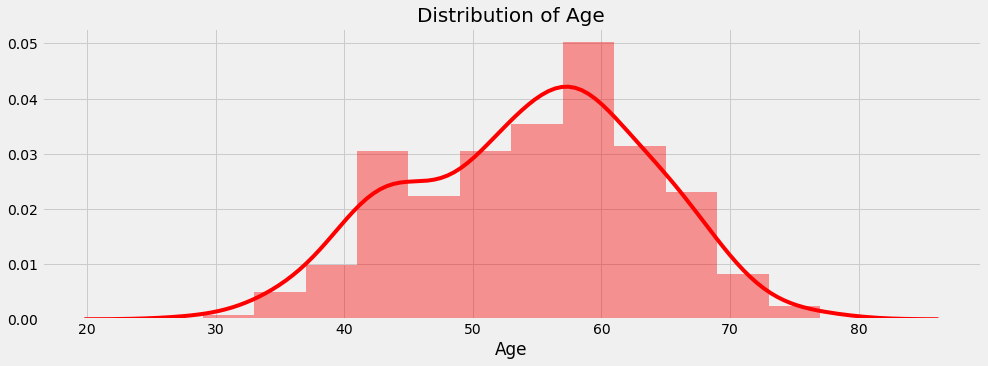

In [10]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

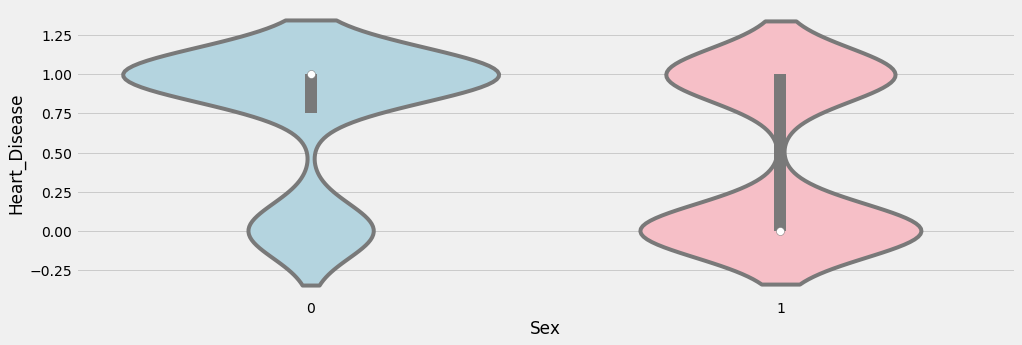

In [11]:
sns.violinplot("Sex","Heart_Disease",  data=df,
               palette=["lightblue", "lightpink"]);

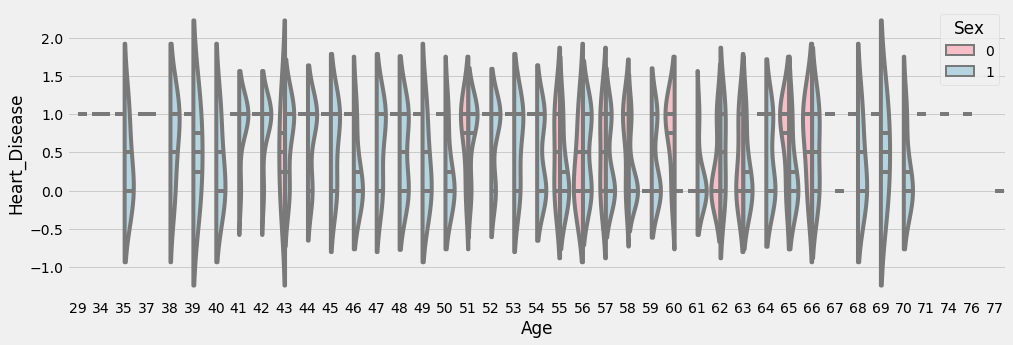

In [12]:
men = (df.Sex == '1')
women = (df.Sex == '0')
with sns.axes_style(style=None):
    sns.violinplot("Age", "Heart_Disease", hue="Sex", data=df,
                   split=True, inner="quartile",
                   palette=["lightPink", "LightBlue"]);

Looking at this, we can see where the distributions of men and women differ : Change the colour for better interpretation

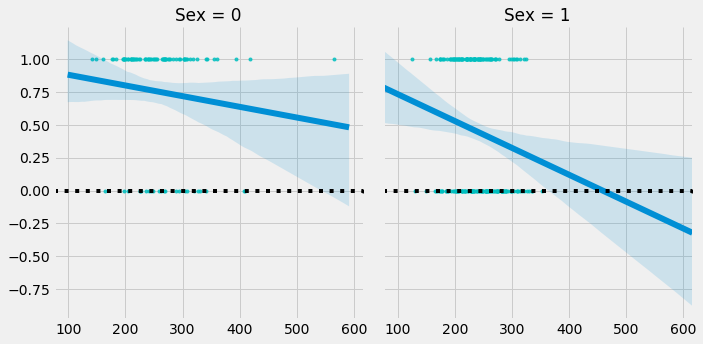

In [13]:
g = sns.lmplot('Cholesterol', 'Heart_Disease', col='Sex', data=df,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, color="k", ls=":");

In [14]:
dftest=df.groupby(["Sex","Heart_Disease"]).apply(lambda x:x[x.Heart_Disease == 1 ])
len(dftest[dftest.Sex == 0])
len(dftest[dftest.Sex == 1])

93

In [15]:
df.head()

,Heart_Disease,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Rest_Ecg,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,St_Depression,St_Slope,Num_major_vessels,Thalassemia
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
HighBp= df[df.Resting_Blood_Pressure > 140].groupby(["Heart_Disease"]).apply(lambda x:x[x.Heart_Disease==1]).count().max()

TotalSuffering = len(df[df.Heart_Disease==1])
(HighBp/TotalSuffering)*100


16.363636363636363

In [17]:
HighBp= df[df.Resting_Blood_Pressure > 200].groupby(["Heart_Disease"]).apply(lambda x:x[x.Heart_Disease==1]).count().max()

TotalSuffering = len(df[df.Heart_Disease==1])
(HighBp/TotalSuffering)*100

nan

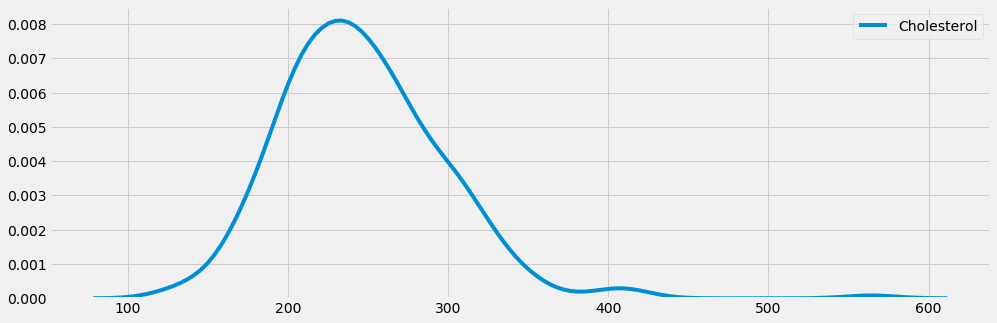

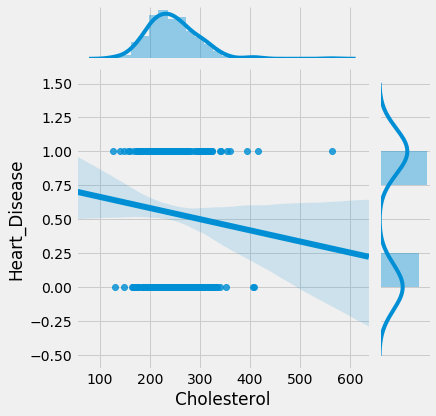

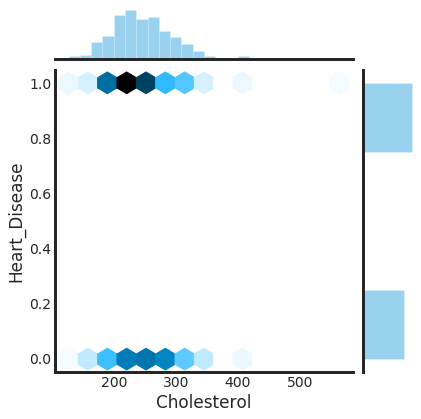

In [18]:
sns.kdeplot(df.Cholesterol)
sns.jointplot("Cholesterol", "Heart_Disease", data=df, kind='reg');
with sns.axes_style('white'):
    sns.jointplot("Cholesterol", "Heart_Disease", data=df, kind='hex')

In [19]:
HighCholesterol= df[df.Cholesterol > 200].groupby(["Heart_Disease"]).apply(lambda x:x[x.Heart_Disease==1]).count().max()

TotalSuffering = len(df[df.Heart_Disease==1])
(HighBp/HighCholesterol)*100

nan

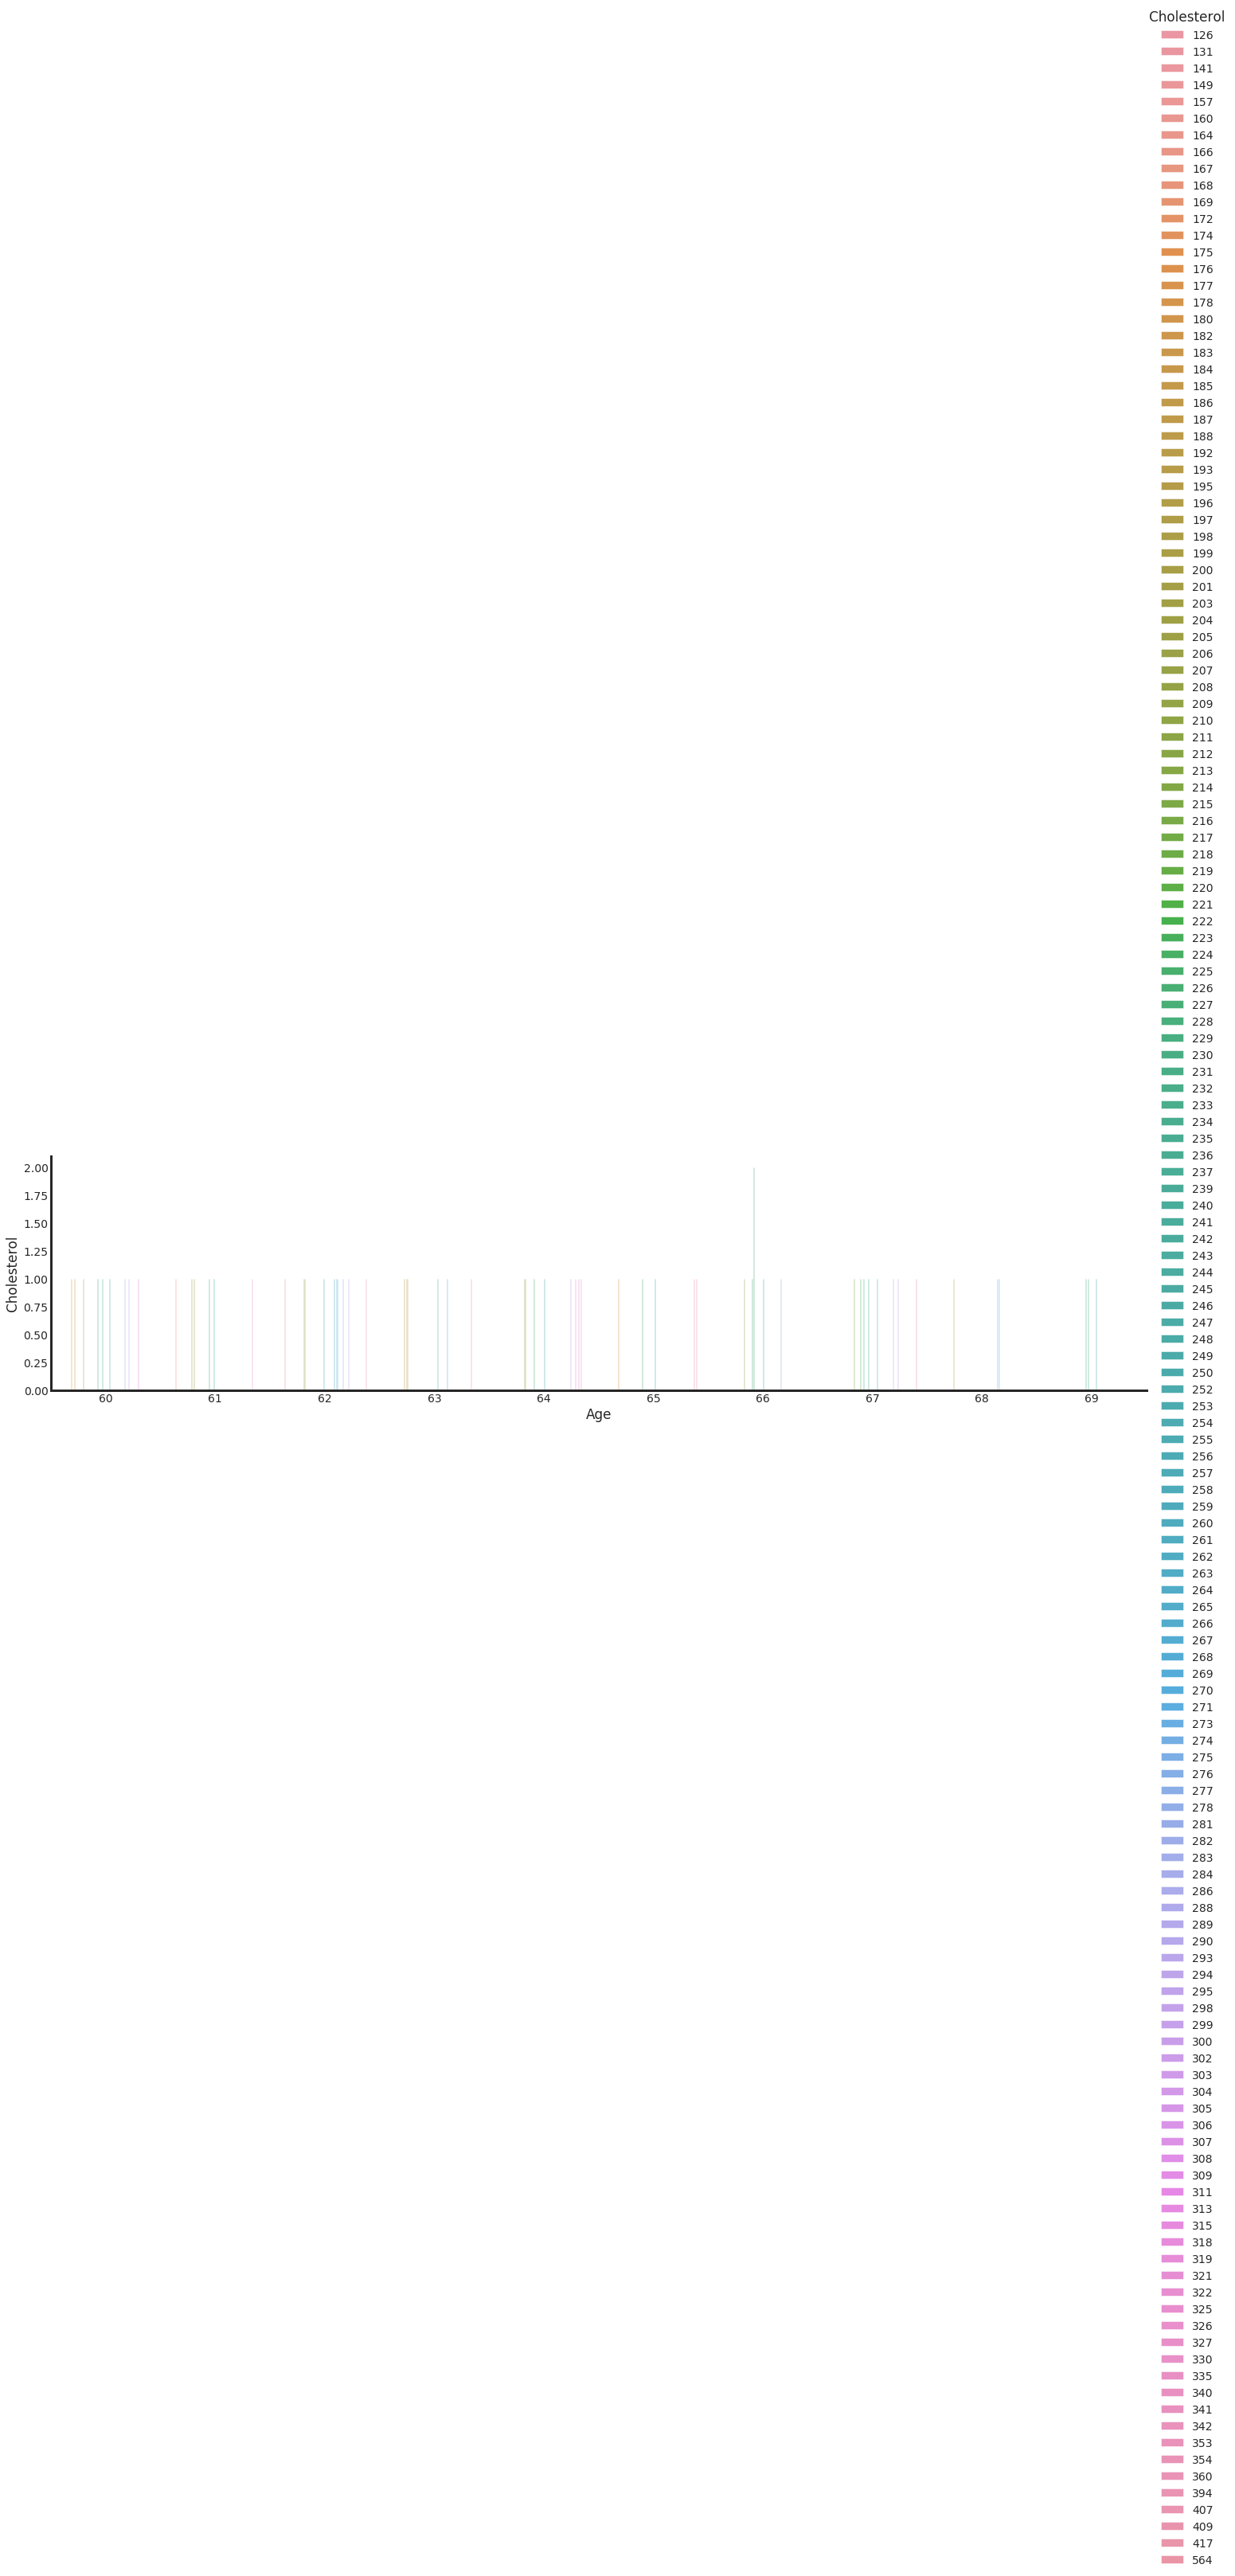

In [20]:
with sns.axes_style('white'):
    g = sns.factorplot("Age", data=df, aspect=4.0, kind='count',
                       hue='Cholesterol', order=range(60, 70))
    g.set_ylabels('Cholesterol')

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from matplotlib import pyplot

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Heart_Disease', 1), df['Heart_Disease'],\
                                                    test_size = .2, random_state=0) #split the data


In [31]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8429752066115702
Accuracy for test set for Logistic Regression = 0.8360655737704918


In [33]:
cm_test

array([[21,  4],
       [ 6, 30]])

In [34]:
cm_train

array([[ 87,  14],
       [ 24, 117]])

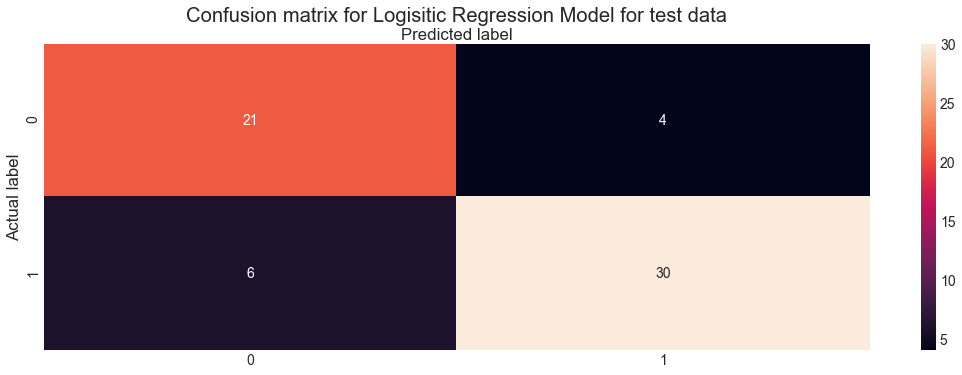

In [78]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cm_test), annot = True,
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model for test data', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

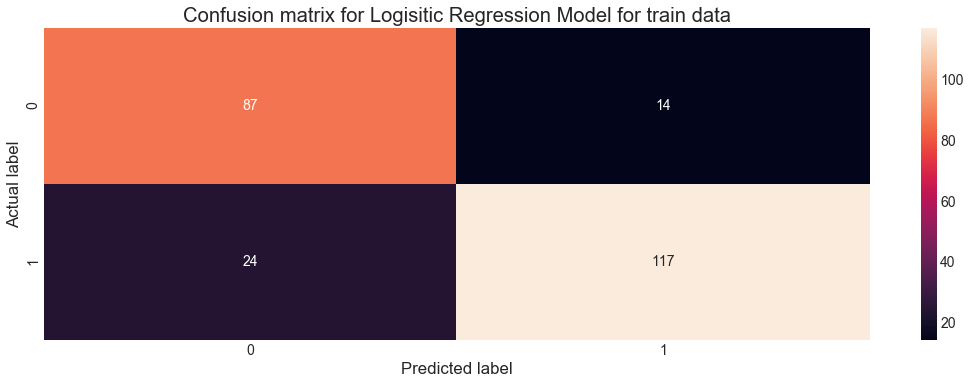

In [77]:
sns.heatmap(pd.DataFrame(cm_train), annot = True,
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model for train data', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
y_prob = classifier.predict_proba(X_test)

In [75]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

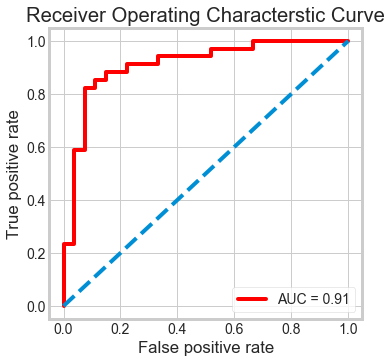

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(false_positive_rate,true_positive_rate,color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()